<a href="https://colab.research.google.com/github/Unnati1805-02/Build-with-AI/blob/main/Unnati_Bansal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')
Mean Squared Error: 8.411170417456376e-27
Root Mean Squared Error: 9.171243327628145e-14


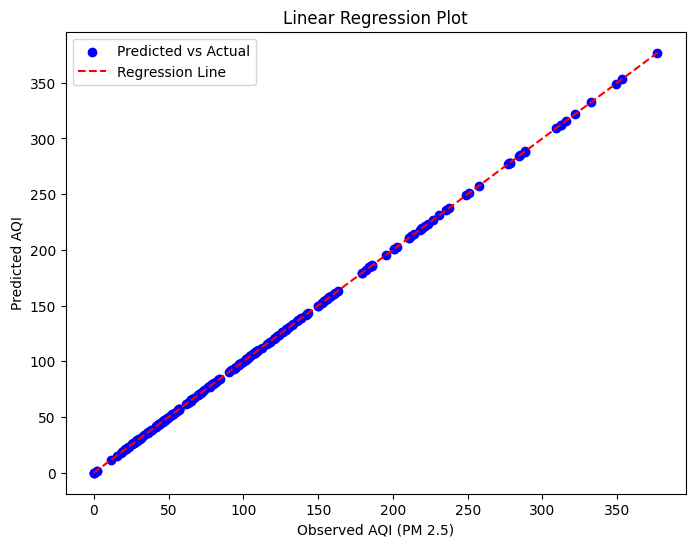

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
url = "https://drive.google.com/uc?id=1f2E4yY9jmZlgRFirp0vSWPx1DlSYJ6ie"
data = pd.read_csv(url)

# Step 2: Check the data and select features for the model
print(data.columns)  # Look at the column names
features = ['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5']  # Features we will use for prediction
label = 'PM 2.5'  # The target column we want to predict

# Step 3: Handle missing data by filling with the mean of each column
data[features] = data[features].fillna(data[features].mean())

# Step 4: Split the data into features (X) and target (y)
X = data[features]  # Features (independent variables)
y = data[label]  # Target (dependent variable)

# Step 5: Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Normalize the data using StandardScaler (important for linear regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Train a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Step 8: Make predictions using the trained model
y_pred = model.predict(X_test_scaled)

# Step 9: Calculate the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

# Step 10: Plot the predicted vs actual values to visualize the performance of the model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Regression Line')
plt.title('Linear Regression Plot')
plt.xlabel('Observed AQI (PM 2.5)')
plt.ylabel('Predicted AQI')
plt.legend()
plt.show()
